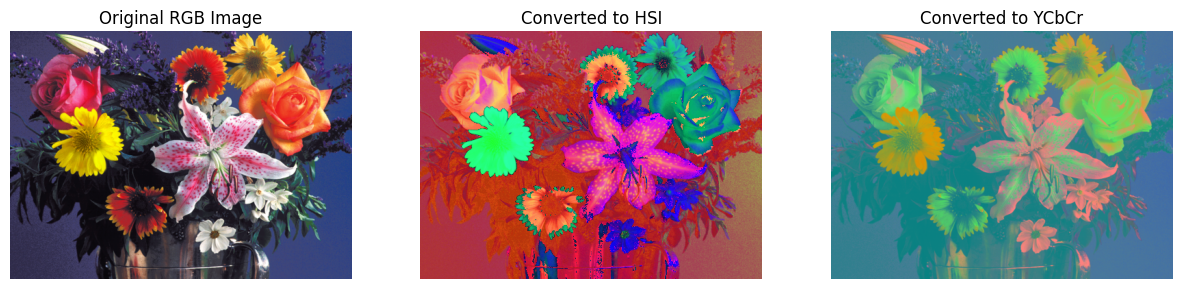

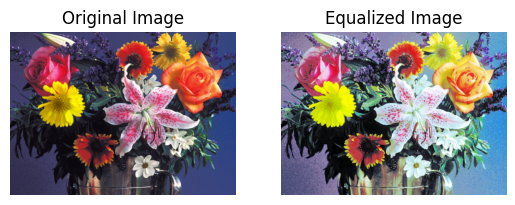

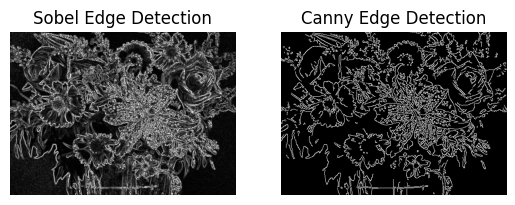

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/flowers.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def rgb_to_hsi(rgb):
    rgb = rgb / 255.0
    R, G, B = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    I = np.mean(rgb, axis=2)
    S = 1 - 3 * np.min(rgb, axis=2) / (R + G + B + 1e-6)
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G)**2 + (R - B) * (G - B))
    H = np.arccos(numerator / (denominator + 1e-6))
    H[B > G] = 2 * np.pi - H[B > G]
    H = H / (2 * np.pi)
    return np.stack([H, S, I], axis=2)

def rgb_to_ycbcr(rgb):
    ycbcr = cv2.cvtColor(rgb.astype(np.uint8), cv2.COLOR_RGB2YCrCb)
    return ycbcr

image_hsi = rgb_to_hsi(image_rgb)
image_ycbcr = rgb_to_ycbcr(image_rgb)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_hsi)
plt.title("Converted to HSI")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_ycbcr)
plt.title("Converted to YCbCr")
plt.axis('off')

plt.show()

r, g, b = cv2.split(image_rgb)
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)
image_eq = cv2.merge([r_eq, g_eq, b_eq])

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_eq)
plt.title("Equalized Image")
plt.axis('off')
plt.show()

image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.hypot(sobel_x, sobel_y)
sobel_edges = np.uint8(np.absolute(sobel_edges))
canny_edges = cv2.Canny(image_gray, 100, 200)

plt.subplot(1, 2, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()
